# Wybór influencerów w kampanii marketingu wirusowego 

Poniżej zaprezentowana jest analiza rozprzestrzeniania się informacji o produkcie. Na potrzeby case'u tworzona jest fikcyjna sieć klientów reprezentowana grafem, a następnie przeprowadzona jest symulacja rozprzestrzeniania się informacji o produkcie.

Załóżmy, że dysponujemy siecią klientów firmy X, która sprzedaje różne produkty w sklepie internetowym. Przykładowa sieć może być w praktyce zrekonstruowana na przykład poprzez budowanie systemu poleceń produktów. Przykładowo: osoba A poleca produkt osobie B. Jeśli osoba B zakupi polecony produkt, osoba A otrzyma określony procent zniżki na kolejny produkt. Dzięki rejestrowaniu klientów i podtrzymaniu takiej sieci, możliwa jest jej późniejsza rekonstrunkcja do postaci grafu. Analizując zachowania klientów na platformie, można wyróżnić różne typy klientów: niektórzy mogą przynosić większy zysk w postaci bezpośrednich zakupów, a inni w postaci wielu poleceń produktów, które mogą powodować kaskady nowych poleceń i łącznie przynieść dużo większy zysk. Analizując dane historyczne na temat klientów, zliczając ilości i częstotliwości poleceń produktów w przeszłości między klientami, możemy utworzyć odpowiedni indeks, który opisuje szansę na polecenie produktów między poszczególnymi parami klientów w przeciągu jednego dnia.

Jednak w naszym przypadku wygenerujemy losową sieć i założymy, że dysponujemy takimi informacjami na temat klientów. Założymy również, że naszym celem jest jak najszersze rozpromowanie produktu w naszej sieci poleceń. 

### Agenda:
1) Generowanie losowej sieci klientów <br>
2) Przeprowadzanie symulacji  <br>

## 1. Generowanie losowej sieci klientów

Poniżej tworzymy losowy graf Wattsa-Strogatza reprezentujący sztuczną sieć klientów firmy X. Zakładamy, że będzie się ona składać z 300 węzłów i odzwierciedlać swoją strukturą sieci małego świata. 

In [1]:
import difpy as dp

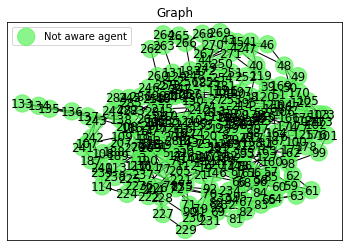

In [5]:
G, pos = dp.graph_init(n = 300, 
                       k= 5,
                       rewire_prob = 0.2, 
                       initiation_perc = 0.00,
                       show_attr = False, 
                       draw_graph = True)

Na powyższym rusunku można dostrzec, że siećskłada się początkowo z agentów, do których nie dotarła jeszcze żadna informacja o produkcie. Poniżej sprawdzamy dokładnej niektóre cechy struktury sieci.


General information:

nodes :  300
edges :  600
mean node degree :  4
average clustering coefficient :  0.2617
transitivity :  0.2316


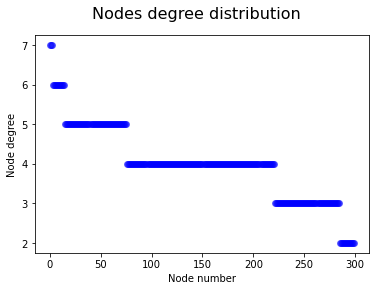

In [8]:
dp.graph_stats(G, pos, show_attr = False, draw_degree = True,  
            draw_graph = False)

## 2. Przeprowadzanie symulacji

Dostaliśmy budżet pozwalający na przekazanie 5 sztuk produktu firmy X. Możemy przekazać produkt 5-ciu wybranym osobom z prośbą o rekomendację. Potencjalnych influencerów będziemy motywować zniżką 5% na kolejny produkt jeśli osoby, którym polecą produkt, zakupią go używając przekazanego w mailu linka polecającego (co umożliwi nam również dalsze monitorowanie i późniejszą ewaluację naszej kampanii marketingowej).  

Zakładamy, że chcemy uzyskać pomiar średniej dziennej szybkości rozprzestrzenania się informacji marketingowej w przeciągu 30 dni.

In [ ]:
import copy
G2 = copy.deepcopy(G)

In [7]:
solution = dp.optimize_rs(G2,
        number_of_nodes = 5, # number of nodes to seed
        number_of_iter = 30, # number of iterations 
        log_info_interval = 10, # interval of information log 
                       
        n = 10, # number of simulation steps simulation
        sequence_len = 30, # number of simulations in one sequence
                       
        kernel = 'weights', # kernel type
        custom_kernel = None, # custom kernel function
        WERE_multiplier = 100, 
        oblivion = False, # information oblivion feature 
        engagement_enforcement = 1.01
        )


10 Iterations passed with best solution: 8.9633 in 55.77 seconds.
20 Iterations passed with best solution: 9.23 in 107.32 seconds.

Best aware agents increment per simulation step: 9.23

Set of initial aware nodes: [173, 262, 84, 68, 205]


Z powyższej symulacji jesteśmy w stanie uzyskać zestaw potencjalnych influencerów, którzy mogą najskuteczniej rozpromować produkt.
Po przebytej kampanii, możemy przeprowadzić ewaluację, zliczając ile produktów byliśmy w stanie sprzedać, 
oraz czy rzeczywiście nasi wybrani influencerzy byli najlepszymi spreaderami informacji marketingowej i wprowadzać korekty do naszych kolejnych kampanii.

Polecana lektura:
    
    Leskovec, J., Adamic, L. A., & Huberman, B. A. (2007). The Dynamics of Viral Marketing. ACM Transactions on the Web.